<a href="https://www.kaggle.com/code/omarsaad34/digit-recognizer?scriptVersionId=105493215" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Imports
---

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPool2D,Dropout
from keras import layers

Read Dataset
---

In [3]:
train_df = pd.read_csv('../input/digit-recognizer/train.csv')
test_df = pd.read_csv('../input/digit-recognizer/test.csv')

In [4]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
train_labels = train_df['label']
train_features = train_df.values[:,1:]

Conver integer labels to binary matrix

In [20]:
train_labels = tf.keras.utils.to_categorical(train_labels)

In [21]:
print(train_features.shape)
print(train_labels.shape)

(42000, 784)
(42000, 10)


In [28]:
train_features = train_features.reshape(len(train_features) , 28 , 28,1)
train_features.shape

(42000, 28, 28, 1)

Show Some images
---

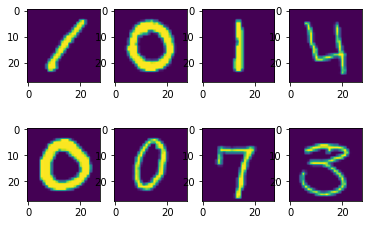

In [29]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(train_features[i])
plt.show()

In [50]:
train_features[3].shape

(28, 28, 1)

Data Augmentation (TODO)
---

In [54]:
IMG_SIZE = 28
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [56]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

Min and max pixel values: 0.0 1.0


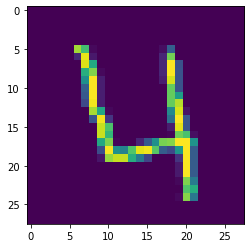

In [55]:
result = resize_and_rescale(train_features[3])
_ = plt.imshow(result)
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

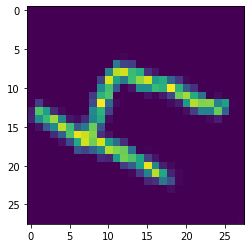

In [58]:
augmented_image = data_augmentation(result)
_ = plt.imshow(augmented_image)

CNN model
---

In [61]:
model = Sequential()
model.add(Conv2D(64,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(32,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(16,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(8,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer='adam',
    loss= keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
)


In [62]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 8)         

In [63]:
history = model.fit(train_features, train_labels, batch_size=64, epochs=100,
                validation_split = 0.2)

2022-09-12 13:33:11.440137: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
525/525 [==============================] - 18s 33ms/step - loss: 1.2896 - accuracy: 0.5382 - val_loss: 0.5559 - val_accuracy: 0.8262
Epoch 2/100
525/525 [==============================] - 16s 31ms/step - loss: 0.7665 - accuracy: 0.7207 - val_loss: 0.3306 - val_accuracy: 0.9042
Epoch 3/100
525/525 [==============================] - 17s 33ms/step - loss: 0.4867 - accuracy: 0.8454 - val_loss: 0.1904 - val_accuracy: 0.9483
Epoch 4/100
525/525 [==============================] - 17s 32ms/step - loss: 0.3452 - accuracy: 0.8938 - val_loss: 0.1448 - val_accuracy: 0.9596
Epoch 5/100
525/525 [==============================] - 17s 33ms/step - loss: 0.2928 - accuracy: 0.9111 - val_loss: 0.1337 - val_accuracy: 0.9629
Epoch 6/100
525/525 [==============================] - 17s 33ms/step - loss: 0.2588 - accuracy: 0.9206 - val_loss: 0.1211 - val_accuracy: 0.9669
Epoch 7/100
525/525 [==============================] - 16s 31ms/step - loss: 0.2336 - accuracy: 0.9299 - val_loss: 0.1085 - val_ac

In [64]:
features_test = test_df.values
features_test = features_test.reshape(features_test.shape[0],28,28,1)

In [65]:
pred= model.predict(features_test)

In [66]:
pred = np.argmax(pred,axis=1)

In [ ]:
print(pred)

In [67]:
output = pd.DataFrame({'ImageId': test_df.index + 1, 'Label': pred.flatten()})
output.to_csv('submission.csv',index=False)
output


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
